# Exploring The World Happiness Reports by Region

What is happiness to you?

The member states of the United Nations, through its [Sustainable Development Solutions Network (SDSN)](https://www.unsdsn.org/) launched in 2012, has begun the process of quantifying happiness in each country around the world, in an effort to collect information that will help achieve the [Sustainable Development Goals (SDGs)](https://sdgs.un.org/goals) of the 21st Century. This process is known as [The World Happiness Report](https://worldhappiness.report/), and a new report is scheduled to arrive every year for the foreseeable future.

To the United Nations, quantifying happiness involves measuring and aggregating 6 explanatory factors. The aggregate of these factors is known as the "Happiness Score". The 6 explanatory factors that the UN has agreed upon are:

* GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Perception of curruption.

The UN has chosen these factors because the most current research has shown that these 6 factors most accurately explain national-level differences in life evaluations. The 6 factors are not meant to be interpreted as specific causal agents, but rather to be understood as proven correlates to the happiness and well-being of a nation. They are seen as trusted metrics in the emerging science of happiness and well-being. ([The 2019 World Happiness Report FAQ](https://worldhappiness.report/faq/))

## Goal

I would like to know how Happiness has changed in each region of the world since the beginning of the UN's publishing of The World Happiness Report. To achieve this goal, I would like to make use of every World Happiness Report that has been published since the report's inception, 2012. However, since the UN has not made public the datasets that were used in 2012 and 2013, and it did not publish a report in 2014, all of the next most recent World Happiness Reports will have to suffice.

### Research Question

*How has Happiness changed in each region of the world since 2015, the year that the UN began publicizing its World Happiness Reports' raw datasets?*

To answer this question, I will analyze the 6 most recent World Happiness Reports:

* [The 2021 World Happiness Report](https://worldhappiness.report/ed/2021/)
* [The 2020 World Happiness Report](https://worldhappiness.report/ed/2020/)
* [The 2019 World Happiness Report](https://worldhappiness.report/ed/2019/)
* [The 2018 World Happiness Report](https://worldhappiness.report/ed/2018/)
* [The 2017 World Happiness Report](https://worldhappiness.report/ed/2017/)
* [The 2016 World Happiness Report](https://worldhappiness.report/ed/2016/)
* [The 2015 World Happiness Report](https://worldhappiness.report/ed/2015/).

## Table of Contents:
* [Introducing the Data](#introducing)
* [Cleaning the Data](#cleaning)
    * [Standardizing the column names](#column_names)
        * [Standardizing with string methods](#string_methods)
        * [Dropping the raw score columns from the 2020 dataframe](#raw_score)
        * [Standardizing with renaming dictionary ](#renaming)
    * [Adding the `year` column](#year)
    * [Adding the `happiness` column](#happiness)
    * [Adding the `region` column](#region)
    * [Adding the `rank` column](#rank)
    * [Standardizing the column order](#column_order)
    * [Concatenating the dataframes](#concatenating)
    * [Filling the `region` column](#filling)
* [Calculating the Aggregate Data](#aggregate)
    * [Calculating the Regional Mean Happiness Scores](#calculating)
    * [Analyzing the Regional Mean Happiness Scores](#analyzing)
* [Data Visualization](#visualization)
    * [Visualizing the Highest Happiness Scores](#highest)
    * [Visualizing the Medium Happiness Scores](#medium)
    * [Visualizing the Lowest Happiness Scores](#lowest)
    * [Visualizing all Plots in one Figure](#plots)
* [Conclusion](#conclusion)
    * [Further Research](#further)

## Introducing the Data <a class="anchor" id="introducing"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
# Creating a function to read in each World Happiness Report file from 2015 to 2019

def read_file(string):
    
    df = pd.read_csv('World Happiness Report {} Agg Data.csv'.format(str(string)))
    
    return df

years = [2015,2016,2017,2018,2019, 2020, 2021]

# Reading in the csv files as dataframes and saving them into a list

dfs = []

for year in years:
    
    df = read_file(year)
    
    dfs.append(df)
    
# Converting the list of dataframes into a dataframe of dataframes, indexed by year
    
happy = pd.DataFrame({'df': dfs}, index=years)

In [3]:
# Viewing the number of rows & columns for each dataframe 

for year in years:
    
    print(str(year) + ' World Happiness Report:\n\n' + str(happy.loc[year].df.shape) + ' (Countries, Features)\n\n')

2015 World Happiness Report:

(158, 9) (Countries, Features)


2016 World Happiness Report:

(157, 11) (Countries, Features)


2017 World Happiness Report:

(155, 11) (Countries, Features)


2018 World Happiness Report:

(156, 11) (Countries, Features)


2019 World Happiness Report:

(156, 11) (Countries, Features)


2020 World Happiness Report:

(153, 20) (Countries, Features)


2021 World Happiness Report:

(149, 20) (Countries, Features)




In [4]:
# Viewing the first five rows for each of the 5 dataframes

happy.loc[2015].df.head()

,country,Dystopia + residual,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Regional indicator
0,Switzerland,2.517383,1.396505,1.349505,0.941432,0.665573,0.296775,0.419777,Western Europe
1,Iceland,2.702013,1.302324,1.402231,0.947844,0.628772,0.436297,0.141451,Western Europe
2,Denmark,2.492042,1.325478,1.360581,0.874641,0.649384,0.341386,0.483573,Western Europe
3,Norway,2.465312,1.458997,1.330955,0.885209,0.669732,0.346989,0.365034,Western Europe
4,Canada,2.451756,1.326292,1.322608,0.905631,0.632968,0.458109,0.329573,North America and ANZ


In [5]:
happy.loc[2016].df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual
0,Denmark,7.526,7.592,7.460,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390
1,Switzerland,7.509,7.590,7.428,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632
2,Iceland,7.501,7.669,7.333,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373
3,Norway,7.498,7.575,7.421,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645
4,Finland,7.413,7.475,7.351,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965


In [6]:
happy.loc[2017].df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
0,Norway,7.537,7.594,7.480,1.616,1.534,0.797,0.635,0.362,0.316,2.277
1,Denmark,7.522,7.582,7.462,1.482,1.551,0.793,0.626,0.355,0.401,2.314
2,Iceland,7.504,7.622,7.386,1.481,1.611,0.834,0.627,0.476,0.154,2.323
3,Switzerland,7.494,7.562,7.426,1.565,1.517,0.858,0.620,0.291,0.367,2.277
4,Finland,7.469,7.528,7.410,1.444,1.540,0.809,0.618,0.245,0.383,2.430


In [7]:
happy.loc[2018].df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393
1,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
happy.loc[2019].df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
happy.loc[2020].df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
happy.loc[2021].df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [13]:
# Viewing the columns, datatypes, and number of non-null values for each dataframe

for year in years:
    
    print(str(year) + '\n')

    print(str(happy.loc[year].df.info()) + '\n')

2015

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     158 non-null    object 
 1   Dystopia + residual                         158 non-null    float64
 2   Explained by: Log GDP per capita            158 non-null    float64
 3   Explained by: Social support                158 non-null    float64
 4   Explained by: Healthy life expectancy       158 non-null    float64
 5   Explained by: Freedom to make life choices  158 non-null    float64
 6   Explained by: Generosity                    158 non-null    float64
 7   Explained by: Perceptions of corruption     158 non-null    float64
 8   Regional indicator                          158 non-null    object 
dtypes: float64(7), object(2)
memory usage: 11.2+ KB
None

2016

<class 'pandas.core.fr

In all of the dataframes it looks like the columns need to be cleaned up and standardized. Luckily, this should not take long. All of the columns appear to be of the correct datatypes, and no null values exist in any of them.

To clean up and standardize the columns, I will focus on those which I choose to analyze. The columns that I will keep in each are the country columns, the happiness score columns, the regional indicator columns, and the 7 columns that are used to calculate the happiness score (6 "Explained by" factor columns + the "Dystopia + residual" column. The whisker columns will not be used in this analysis, nor will the 6 "raw score" factor columns or the ladder columns in the 2020 dataframe.

## Cleaning the Data <a class="anchor" id="cleaning"></a>

### Standardizing the column names <a class="anchor" id="column_names"></a>

#### Standardizing with string methods <a class="anchor" id="string_methods"></a>

In [14]:
# Using string methods to standardize the format of each column name

for year in years:
    
    happy.loc[year].df.columns = happy.loc[year].df.columns.str.strip().str.lower()
    
    happy.loc[year].df.columns = happy.loc[year].df.columns.str.replace('\(\d+\.\d+\)', '').str.replace('[+:]','')
    
    happy.loc[year].df.columns = happy.loc[year].df.columns.str.replace('\s+','_').str.replace('-','_')

In [15]:
# Viewing the column names after the first cleaning process

for year in years:
    
    print(str(year) + '\n\n' + str(happy.loc[year].df.columns) + '\n\n')

2015

Index(['country', 'dystopia_residual', 'explained_by_log_gdp_per_capita',
       'explained_by_social_support', 'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions_of_corruption', 'regional_indicator'],
      dtype='object')


2016

Index(['country', 'happiness_score', 'whisker_high', 'whisker_low',
       'explained_by_gdp_per_capita', 'explained_by_social_support',
       'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions_of_corruption', 'dystopia_residual'],
      dtype='object')


2017

Index(['country', 'happiness_score', 'whisker_high', 'whisker_low',
       'explained_by_gdp_per_capita', 'explained_by_social_support',
       'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions_o

#### Dropping the raw score columns from the 2020 dataframe <a class="anchor" id="raw_score"></a>

I have to drop the raw score factor columns from the 2020 dataframe now because this will make renaming the "Explained by" columns in the dataframe much easier:

In [17]:
# Dropping the raw score columns in the 2020 and 2021 dataframes

happy.loc[2020].df = happy.loc[2020].df.drop(happy.loc[2020].df.columns[2:13], axis=1)
happy.loc[2021].df = happy.loc[2021].df.drop(happy.loc[2021].df.columns[2:13], axis=1)

#### Standardizing with a renaming dictionary <a class="anchor" id="renaming"></a>

In [18]:
# This cell is dedicated to using a renaming dictionary to standardize all of the relevant column names

# Preparing the renaming dictionary

rename_dict = {'country_name': 'country',
               'regional_indicator': 'region',
               'explained_by_log_gdp_per_capita': 'gdp',
               'explained_by_social_support': 'social',
               'explained_by_healthy_life_expectancy': 'life_expectancy',
               'explained_by_freedom_to_make_life_choices': 'freedom',
               'explained_by_generosity': 'generosity',
               'explained_by_perceptions_of_corruption': 'corruption',
               'happiness_score': 'happiness',
               'dystopia_residual' : 'dystopia',
               'explained_by_gdp_per_capita': 'gdp'}

# Standardizing all of the column names with the renaming dictionary

for year in years:
    
    happy.loc[year].df.rename(rename_dict, axis=1, inplace=True)

In [19]:
# Viewing the standardized column names

for year in years:
    
    print(str(year) + '\n\n' + str(happy.loc[year].df.columns) + '\n\n')

2015

Index(['country', 'dystopia', 'gdp', 'social', 'life_expectancy', 'freedom',
       'generosity', 'corruption', 'region'],
      dtype='object')


2016

Index(['country', 'happiness', 'whisker_high', 'whisker_low', 'gdp', 'social',
       'life_expectancy', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')


2017

Index(['country', 'happiness', 'whisker_high', 'whisker_low', 'gdp', 'social',
       'life_expectancy', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')


2018

Index(['country', 'happiness', 'whisker_high', 'whisker_low', 'dystopia',
       'gdp', 'social', 'life_expectancy', 'freedom', 'generosity',
       'corruption'],
      dtype='object')


2019

Index(['country', 'happiness', 'whisker_high', 'whisker_low', 'dystopia',
       'gdp', 'social', 'life_expectancy', 'freedom', 'generosity',
       'corruption'],
      dtype='object')


2020

Index(['country', 'region', 'gdp', 'social', 'life_expectancy', 'freedom',
    

### Adding the `year` column <a class="anchor" id="year"></a>

If I am going to concatenate all of the dataframes into one, then I should make a `year` column that will show which year each datum is from.

I will do this now:

In [20]:
# Adding a `year` column to each dataframe

for year in years:
    
    happy.loc[year].df['year'] = year

### Adding the `happiness` column <a class="anchor" id="happiness"></a>

The 2015 and 2020 dataframes do not have a `happiness` column. I will calculate the happiness score for these years and add the column to their respective dataframes:

In [22]:
# Calculating the happiness score for the 2015, 2020, and 2021 dataframes by summing the relevant columns

# Returning the result as `happiness` column

happy.loc[2015].df['happiness'] = happy.loc[2015].df.loc[:, 'dystopia':'corruption'].sum(axis=1)

happy.loc[2020].df['happiness'] = happy.loc[2020].df.loc[:, 'gdp':'dystopia'].sum(axis=1)

happy.loc[2021].df['happiness'] = happy.loc[2021].df.loc[:, 'gdp':'dystopia'].sum(axis=1)

### Adding the `region` columns <a class="anchor" id="region"></a>

In order to see how happiness has changed in each region over time, I need a `region` column in each dataframe. Two of the dataframes that we have currently contain full `region` columns: the 2015 dataframe and the 2020 dataframe. These dataframes display a different number of rows, so they must contain different countries in them. My goal here is to create a mapping dictionary that can map `country`:`region` key:value pairs onto the new `region` column of all of the necessary dataframes. To do this, I will have to use both of these dataframes.

It is necessary to use both of these dataframes rather than just the larger one because although the 2015 dataframe is larger, the 2020 dataframe may still contain countries that the 2015 dataframe does not. This is likely true since this "science of happiness" and The World Happiness Report are new enough that the scope of countries included in each year is probably more variable than desired. Therefore, both dataframes probably have valuable `country`:`region` pairs for our other dataframes.

To employ both dataframes, I will have to create a mapping dictionary for the `country`:`region` pairs of both the 2015 and the 2020 dataframes, and then I will have to merge those dictionaries together as one comprehensive mapping dictionary. I will do that now:

In [23]:
# This cell is dedicated to creating the dictionary-merging fuction
# This function will be called when it is time to merge the two mapping dictionaries

# Defining the function that will merge these two dictionaries

def merge_dictionaries(left: dict, right: dict) -> dict:

    """Merge two dictionaries using a shallow copy."""

    temp: dict = left.copy()

    temp.update(right)

    return temp

In [24]:
# This cell is dedicated to mapping the `region` column to the `country` column in each necessary dataframe

# Creating dataframes containing the `country` and `region` columns of the 2015 and 2020 dataframes

regions_2015 = happy.loc[2015].df[['country','region']]

regions_2020 = happy.loc[2020].df[['country','region']]

# Creating the 2015 country-region mapping dictionary using the 2015 country-region dataframe

regions_mapping_2015 = {}

for i, row in regions_2015.iterrows():
    
    regions_mapping_2015[row[0]] = row[1]

# Creating the 2020 country-region mapping dictionary using the 2020 country-region dataframe

regions_mapping_2020 = {}

for i, row in regions_2020.iterrows():
    
    regions_mapping_2020[row[0]] = row[1]

# Merging the two mapping dictionaries into one regions mapping dictionary

regions_mapping = merge_dictionaries(regions_mapping_2015, regions_mapping_2020)
    
# Adding the `region` column to each dataframe using the country-region mapping dictionary

for year in years:
    
    happy.loc[year].df['region'] = happy.loc[year].df['country'].map(regions_mapping)

### Adding the `rank` column <a class="anchor" id="rank"></a>

In our analysis, it may be useful to know the rank of each country each year. To ensure that this information is retained, I will add a `rank` column to each dataframe:

In [25]:
# Adding the `rank` column by making it equal to +1 of the index of each row

for year in years:
    
    happy.loc[year].df['rank'] = happy.loc[year].df.index + 1

### Standardizing the column order <a class="anchor" id="column_order"></a>

Data is easier to understand when columns are ordered in an insightful manner. Since the final goal of this cleaning process is to concatenate the dataframes into one large dataframe, I will choose one preferred column order, and standardize each dataframe to that order:

In [26]:
# Setting the preferred standard column order

# Standardizing each dataframe with this preferred column order

for year in years:
    
    happy.loc[year].df = happy.loc[year].df[['rank', 'country', 'region', 'happiness',
                                             'gdp', 'social', 'life_expectancy', 'freedom',
                                             'generosity', 'corruption', 'dystopia', 'year']]

### Concatenating the DataFrames <a class="anchor" id="concatenating"></a>

At long last, I can now concatenate the dataframes into one large dataframe:

In [27]:
# Creating the list of dataframes

all_years = []

for year in years:
    
    all_years.append(happy.loc[year].df)
    
# Reversing the order of the dataframes in the list, since the most recent data (2020) should be first
    
all_years.reverse()

# Concatenating the list of dataframes into one large dataframe

happy_all = pd.concat(all_years, ignore_index=True)

In [28]:
# Viewing the first five rows of the dataframe

happy_all.head()

,rank,country,region,happiness,gdp,social,life_expectancy,freedom,generosity,corruption,dystopia,year
0,1,Finland,Western Europe,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,2,Denmark,Western Europe,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,3,Switzerland,Western Europe,7.570,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
3,4,Iceland,Western Europe,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
4,5,Netherlands,Western Europe,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021


In [29]:
# Viewing the last five rows of the dataframe

happy_all.tail()

,rank,country,region,happiness,gdp,social,life_expectancy,freedom,generosity,corruption,dystopia,year
1079,154,Rwanda,Sub-Saharan Africa,3.465038,0.222078,0.773701,0.428643,0.592007,0.226279,0.551911,0.670418,2015
1080,155,Benin,Sub-Saharan Africa,3.340090,0.286655,0.353862,0.319098,0.484496,0.182600,0.080100,1.633279,2015
1081,156,Syria,Middle East and North Africa,3.006290,0.663199,0.474890,0.721932,0.156841,0.471790,0.189060,0.328579,2015
1082,157,Burundi,Sub-Saharan Africa,2.904535,0.015303,0.415867,0.223961,0.118496,0.197269,0.100620,1.833019,2015
1083,158,Togo,Sub-Saharan Africa,2.838959,0.208676,0.139945,0.284430,0.364528,0.166809,0.107313,1.567258,2015


In [30]:
# Viewing the shape of the dataframe

happy_all.shape

(1084, 12)

In [31]:
# Viewing the columns, datatypes, and number of non-null values in the dataframe

happy_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1084 non-null   int64  
 1   country          1084 non-null   object 
 2   region           1071 non-null   object 
 3   happiness        1084 non-null   float64
 4   gdp              1084 non-null   float64
 5   social           1084 non-null   float64
 6   life_expectancy  1084 non-null   float64
 7   freedom          1084 non-null   float64
 8   generosity       1084 non-null   float64
 9   corruption       1084 non-null   float64
 10  dystopia         1084 non-null   float64
 11  year             1084 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 101.8+ KB


### Filling the `region` column <a class="anchor" id="filling"></a>

Some of the rows in the `region` column are now empty. This may be due to new countries being included in the happiness reports after 2015 (2015 is the year from which we got our region data), or this could be due to countries being entered into the datasets with slightly different names than in previous years. Let's go ahead and view some useful information about these `country` and `region` columns so that we can see if we can fill in any of these rows:

In [32]:
# Viewing which countries have a null `region` value

happy_all[happy_all['region'].isnull()]['country'].value_counts()

Somalia                    4
Belize                     3
Hong Kong SAR, China       1
Northern Cyprus            1
Trinidad & Tobago          1
Puerto Rico                1
North Macedonia            1
Hong Kong S.A.R., China    1
Name: country, dtype: int64

Using Google Maps, I can see where all of these countries are located. Let's see which regions our data is divided into so that we can fill in this information:

In [33]:
# Viewing which regions are included in the dataframe

happy_all['region'].value_counts()

Sub-Saharan Africa                    267
Latin America and Caribbean           147
Western Europe                        146
Middle East and North Africa          130
Central and Eastern Europe            118
Commonwealth of Independent States     84
Southeast Asia                         62
South Asia                             49
East Asia                              40
North America and ANZ                  28
Name: region, dtype: int64

I can now use the information that I gather from Google Maps to create a mapping dictionary and map these countries to their corresponding regions:

In [38]:
# Creating a new country-region mapping dictionary

regions_null_mapping = {'Somalia': 'Sub-Saharan Africa',
                        'Belize': 'Latin America and Caribbean',
                        'Hong Kong SAR, China': 'East Asia',
                        'Northern Cyprus': 'Western Europe',
                        'Trinidad & Tobago': 'Latin America and Caribbean',
                        'Hong Kong S.A.R., China': 'East Asia',
                        'Puerto Rico': 'Latin America and Caribbean',
                        'North Macedonia': 'Central and Eastern Europe'}

# Merging the original country-region mapping dictionary + this new country-region mapping dictionary

regions_mapping_full = merge_dictionaries(regions_mapping, regions_null_mapping)

# Mapping the `region` column based on the comprehensive country-region mapping dictionary

happy_all['region'] = happy_all['country'].map(regions_mapping_full)

In [39]:
# Viewing the number of non-null values in the dataframe after mapping with the country-region mapping dictionary

happy_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1084 non-null   int64  
 1   country          1084 non-null   object 
 2   region           1084 non-null   object 
 3   happiness        1084 non-null   float64
 4   gdp              1084 non-null   float64
 5   social           1084 non-null   float64
 6   life_expectancy  1084 non-null   float64
 7   freedom          1084 non-null   float64
 8   generosity       1084 non-null   float64
 9   corruption       1084 non-null   float64
 10  dystopia         1084 non-null   float64
 11  year             1084 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 101.8+ KB


## Calculating the Aggregate Data <a class="anchor" id="aggregate"></a>

\**How has Happiness changed in each region of the world since 2015?\**

To answer this question, I will group the data by the `region` column and calculate aggregate values. In this case, I will calculate the mean Happiness score for each region for each year. I will then display all of this aggregate data in one dataframe so that I can use it for visualization and analysis.

### Calculating the Regional Mean Happiness Scores <a class="anchor" id="calculating"></a>

In [40]:
# This cell is dedicated to creating a dataframe that contains the mean happiness score for each region for each year

# Creating a list that will contain the mean happiness score of each region for each year

regional_means = []

# For each dataframe: 

# Grouping the dataframe by region

# Calculating the mean happiness score of each region, and saving this information as a series object

# Appending each of these series objects to the "regional_means" list

for year in years:
    
    happy_grouped_regional = happy.loc[year].df.groupby('region')
    
    grouped_regional_mean = happy_grouped_regional['happiness'].mean().sort_values(ascending=False)
    
    regional_means.append(grouped_regional_mean)

# Concatenating all of these series objects into one dataframe
    
regionals = pd.concat(regional_means, axis = 1, sort=False)

# Naming the columns of this dataframe by their respective years

regionals.columns = years

In [41]:
# Viewing the dataframe

regionals

,2015,2016,2017,2018,2019,2020,2021
North America and ANZ,7.279144,7.288750,7.226750,7.202500,7.176250,7.173498,7.128500
Western Europe,6.689729,6.685667,6.703714,6.810300,6.842190,6.899224,6.915000
Latin America and Caribbean,6.144683,6.065773,5.957905,5.937750,5.954429,5.981776,5.908000
East Asia,5.626269,5.624167,5.681600,5.720400,5.688833,5.714858,5.810833
Middle East and North Africa,5.406915,5.386053,5.369684,5.294158,5.237000,5.227161,5.219706
Central and Eastern Europe,5.365709,5.424882,5.521706,5.629706,5.776941,5.883814,6.039875
Southeast Asia,5.317536,5.338889,5.444875,5.313444,5.273667,5.383367,5.407556
Commonwealth of Independent States,5.286324,5.293917,5.251583,5.241917,5.256333,5.358342,5.467083
South Asia,4.580709,4.563286,4.628429,4.603857,4.526857,4.475429,4.441714
Sub-Saharan Africa,4.202825,4.101189,4.084605,4.174316,4.290615,4.383499,4.494556


### Analyzing the Regional Mean Happiness Scores <a class="anchor" id="analyzing"></a>

From viewing the dataframe I can already see some interesting patterns:

* Regional mean happiness scores range from a low of 4.1 to a high of 7.3 (rounded) over the 6 years of study.
* Two regions, "North America and ANZ" and "Western Europe," are the only regions that have consistently had happiness scores higher than 6.0. Indeed, "North America and ANZ" is the only region that has always had a happiness score higher than 7.0.
* The "Latin America and Caribbean" region is a particular edge case, in that it had a mean happiness score clearly higher than 6.0 during the 2015 and 2016 studies, but fell slightly below 6.0 (depending on rounding) after that, consitently having a happiness score between 5.94 and 5.98. However, if we round happiness scores to just the second significant digit (in this case the first decimal point), then the mean happiness score for the Latin America and Caribbean region only fell below 6.0 once in the 6 years of study.
* Many regions of the world (5 regions) have consistently had mean happiness scores in the 5.0 - 5.99 range. Most of these regions are in Asia and/or Africa. These regions constitute half of the regions in The World Happiness Report.
* 2 regions of the world, "South Asia" and "Sub-Saharan Africa," have consistently had mean happiness scores between 4.0 and 4.99. The Sub-Saharan Africa region has had the lowest mean happiness score for every year of the study.

## Data Visualization <a class="anchor" id="visualization"></a>

Visualization is key to understanding data. I will go ahead and chart the mean happiness score over time for each region.

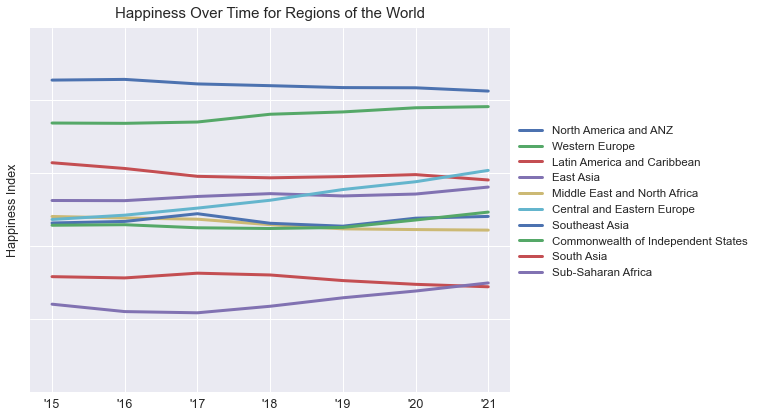

In [46]:
# Plotting the mean happiness score of each year for each region

plt.style.use('seaborn')

plt.figure(figsize=(8.6,6.7))

year_ticks = ["'15", "'16", "'17", "'18", "'19", "'20", "'21"]

for i in range(len(regionals)):
    
    plt.plot(regionals.iloc[i], linewidth=3)
    
plt.title('Happiness Over Time for Regions of the World', fontsize=15, y=1.01)

plt.ylabel('Happiness Index', fontsize=12.5)
    
plt.xticks(years, labels = year_ticks, fontsize=12.5)

plt.yticks([4,5,6,7], labels=[])

plt.ylim((3,8))

plt.legend(regionals.index, loc=(1.01,0.3), fontsize=11.5)

plt.savefig("happiness_over_time_for_regions_of_the_world.png")
    
plt.show()

From this graph a few interesting points can be seen:

* Indeed, "North America and ANZ" and "Western Europe" stand out among all of the other regions as the regions with the highest mean happiness scores. Both regions appear to show minimal change in mean happiness over the course of the 6 years, but a discernible pattern is gleaned: Western Europe demonstrates a slight yet fairly consistent increase in mean happiness, while North America and ANZ demonstrates a slight yet fairly consistent decrease in mean happiness.
* Many regions in the center of the graph seem to be cris-crossing one another and showing variable changes of direction. A lot of interesting information may be hidden in this central area of the graph. Indeed, the "Central and Eastern Europe" region in particular shows perhaps the greatest rise in mean happiness of all the regions over the course of the 6 years.
* The two least happy regions, "South Asia" and "Sub-Saharan Africa," are clearly separated from the rest of the regions on the graph as well. However, Sub-Saharan Africa is demonstrating an interesting phenomenon: it is showing a quick rise in mean happiness score, akin to the rise of the Central and Eastern European region, ever since its recent valley in 2017.

### Visualizing the Highest Happiness Scores <a class="anchor" id="highest"></a>

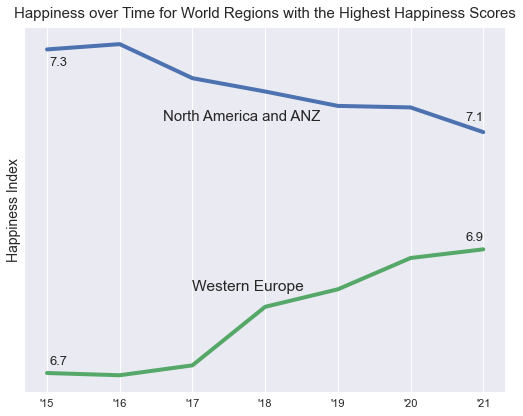

In [125]:
# Plotting the mean happiness score per year for the highest scoring regions

fig, ax = plt.subplots(figsize=(8.6,6.7))

for i in range(2):
    
    plt.plot(regionals.iloc[i], linewidth=4)
    
plt.title("Happiness over Time for World Regions with the Highest Happiness Scores", fontsize=15, y=1.01)
        
plt.xticks(years, labels = year_ticks, fontsize=11)

plt.yticks([])

plt.ylabel('Happiness Index', fontsize=14)

plt.text(2016.6, 7.15, 'North America and ANZ', fontsize=15)
plt.text(2017, 6.84, 'Western Europe', fontsize=15.5)

plt.text(2015.03, 7.25, round(regionals.iloc[0,0], 1), fontsize=13)
plt.text(2015.03, 6.705, round(regionals.iloc[1,0], 1), fontsize=13)

plt.text(2020.75, 7.15, round(regionals.iloc[0,6], 1), fontsize=13)
plt.text(2020.75, 6.93, round(regionals.iloc[1,6], 1), fontsize=13)

plt.savefig("happiness_over_time_for_world_regions_with_the_highest_happiness_scores.png")

plt.show()

* Western Europe is experiencing a rise in happiness score, while North America and ANZ is experiencing a fall.
* The mean happiness score of North America and ANZ has dropped by -0.2 points since 2015, while the mean happiness score of Western Europe has risen by +0.2 points over the same time period.
* The happiness score of Western Europe is rising as fast as the happiness score of North America and ANZ is falling.

### Visualizing the Medium Happiness Scores <a class="anchor" id="medium"></a>

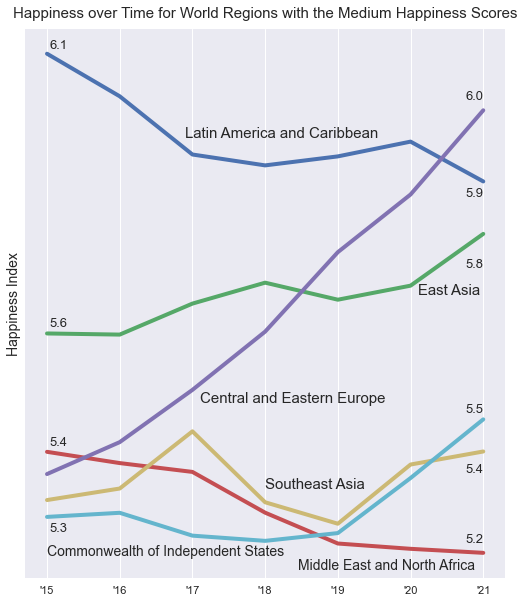

In [107]:
# Plotting the mean happiness score per year for the medium scoring regions

fig, ax = plt.subplots(figsize=(8.6,10.1))

for i in range(2,8):
    
    plt.plot(regionals.iloc[i], linewidth=4)
    
plt.title("Happiness over Time for World Regions with the Medium Happiness Scores", fontsize=15, y=1.01)
        
plt.xticks(years, labels = year_ticks, fontsize=11)

plt.yticks([])

plt.ylabel('Happiness Index', fontsize=14)

plt.text(2016.9, 5.99, 'Latin America and Caribbean', fontsize=15)
plt.text(2020.1, 5.7, 'East Asia', fontsize=15)
plt.text(2018.45, 5.19, 'Middle East and North Africa', fontsize=14)
plt.text(2017.1, 5.5, 'Central and Eastern Europe', fontsize=15)
plt.text(2018, 5.34, 'Southeast Asia', fontsize=15)
plt.text(2015, 5.215, 'Commonwealth of Independent States', fontsize=14)

plt.text(2015.03, 6.155, round(regionals.iloc[2,0], 1), fontsize=13)
plt.text(2015.03, 5.64, round(regionals.iloc[3,0], 1), fontsize=13)
plt.text(2015.03, 5.42, round(regionals.iloc[4,0], 1), fontsize=13)
# plt.text(2015.03, 5.35, round(regionals.iloc[5,0], 1), fontsize=13)
# plt.text(2015.03, 5.3, round(regionals.iloc[6,0], 1), fontsize=13)
plt.text(2015.03, 5.26, round(regionals.iloc[7,0], 1), fontsize=13)

plt.text(2020.75, 5.88, round(regionals.iloc[2,6], 1), fontsize=13)
plt.text(2020.75, 5.75, round(regionals.iloc[3,6], 1), fontsize=13)
plt.text(2020.75, 5.24, round(regionals.iloc[4,6], 1), fontsize=13)
plt.text(2020.75, 6.06, round(regionals.iloc[5,6], 1), fontsize=13)
plt.text(2020.75, 5.37, round(regionals.iloc[6,6], 1), fontsize=13)
plt.text(2020.75, 5.48, round(regionals.iloc[7,6], 1), fontsize=13)

fig.savefig("happiness_over_time_for_world_regions_with_the_medium_happiness_scores.png")

plt.show()

* Latin America and Caribbean has experienced a general downturn in happiness score, dropping -0.2 happiness points over the time period of the data.
* Central and Eastern Europe has shown the largest change in happiness score so far. They began with a happiness score of 5.4 in 2015, and increased their score up to 6.0 over the time period of data collection. This is an absolutely massive change of +0.6 happiness points. This change gives Central and Eastern Europe a higher happiness score than Latin America and Caribbean, marking Central and Eastern Europe as the third happiest region in the world.
* Southeast Asia has fluctuated more than any other region so far. Rather than demonstrating a fairly consistent trend, like many regions, Southeast Asia has increased/decreased happiness by +/- 0.1 points 3 times throughout the time period of data collection.
* The Middle East and North Africa has shown the greatest drop in happiness so far, with a consistent drop over the time period of data collection, from 5.4 to the current 5.2, totalling a -0.2 change in happiness points. The Middle East and Africa is currently the least happy region of the medium Happiness score regions.
* The Commonwealth of Independent States has increased happiness score by +0.2 points since 2015. They have surpassed The Middle East and North Africa region and the Southeast Asia region in terms of happiness score.

### Visualizing the Lowest Happiness Scores <a class="anchor" id="lowest"></a>

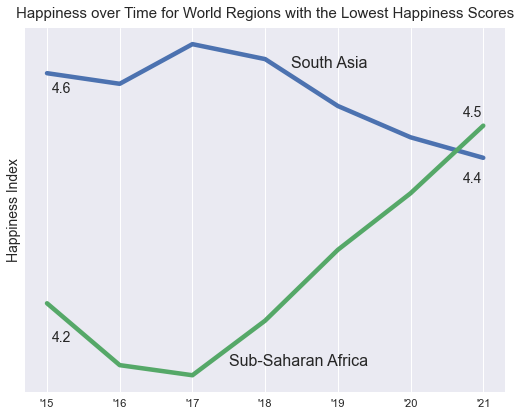

In [123]:
# Plotting the mean happiness score per year for the lowest scoring regions

fig, ax = plt.subplots(figsize=(8.6,6.7))

for i in range(8,10):
    
    plt.plot(regionals.iloc[i], linewidth=4.5)
    
plt.title("Happiness over Time for World Regions with the Lowest Happiness Scores", fontsize=15, y=1.01)
    
plt.xticks(years, labels = year_ticks, fontsize=11)

plt.yticks([])

plt.ylabel('Happiness Index', fontsize=14)

plt.text(2018.35, 4.59, 'South Asia', fontsize=16)
plt.text(2017.5,4.1, 'Sub-Saharan Africa', fontsize=16)

plt.text(2015.06, 4.548, round(regionals.iloc[8,0], 1), fontsize=14)
plt.text(2015.06, 4.14, round(regionals.iloc[9,0], 1), fontsize=14)

plt.text(2020.72, 4.4, round(regionals.iloc[8,6], 1), fontsize=14)
plt.text(2020.72, 4.51, round(regionals.iloc[9,6], 1), fontsize=14)

plt.savefig("happiness_over_time_for_world_regions_with_the_lowest_happiness_scores.png")

plt.show()

* The Sub-Saharan Africa region has shown a strong steady rise in happiness since its dip in 2017. The Sub-Saharan Africa region has increased in happiness by +0.3 points since 2015, giving it a lead over the South Asia region.
* South Asia continues to have a low happiness score, and is decreasing slightly after a peak in 2017. It has decreased by -0.2 happiness points in total.
* The least happy region in the world has now become South Asia.

### Visualizing all Plots in one Figure <a class="anchor" id="plots"></a>

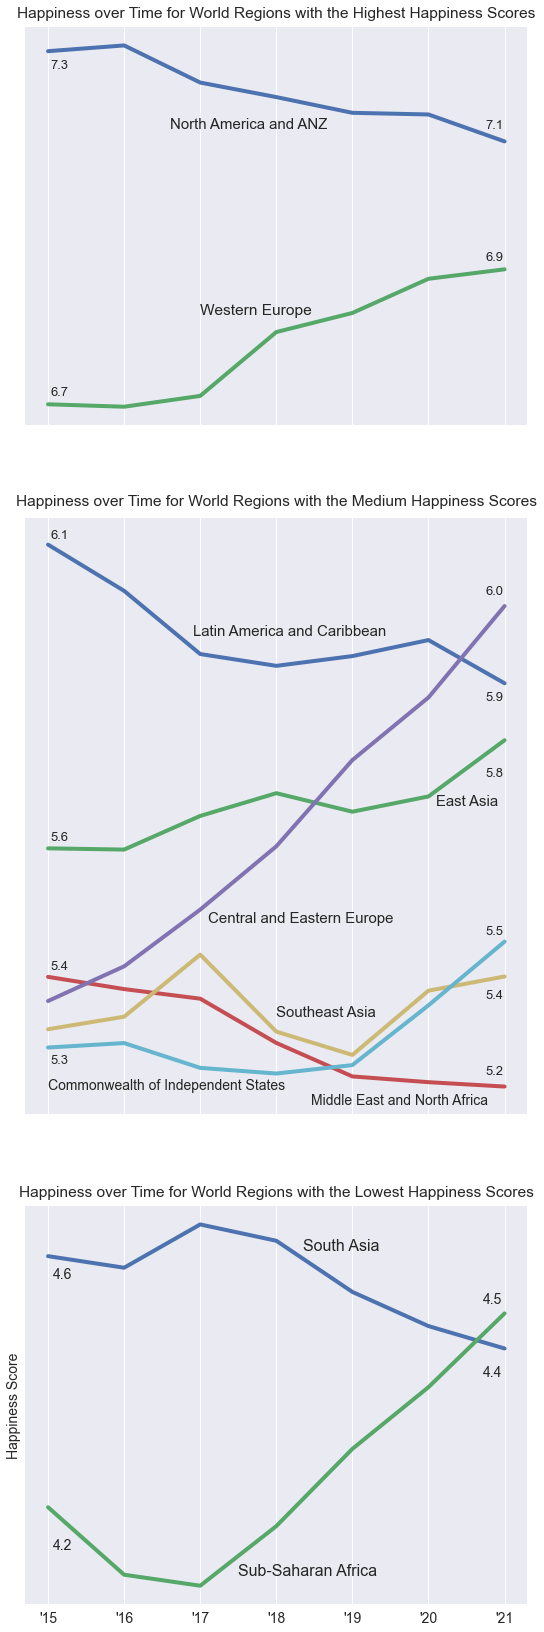

In [126]:
# Plotting all three plots on the same figure and saving the figure to a .png file



fig = plt.figure(figsize=(9, 29))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1.5,1])



ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])



for i in range(2):
    
    ax1.plot(regionals.iloc[i], linewidth=4)
    
ax1.set_title("Happiness over Time for World Regions with the Highest Happiness Scores", fontsize=15.5, y=1.01)

ax1.set_xticklabels([])

ax1.set_yticks([])

ax1.text(2016.6, 7.15, 'North America and ANZ', fontsize=15)
ax1.text(2017, 6.84, 'Western Europe', fontsize=15.5)

ax1.text(2015.03, 7.25, round(regionals.iloc[0,0], 1), fontsize=13)
ax1.text(2015.03, 6.705, round(regionals.iloc[1,0], 1), fontsize=13)

ax1.text(2020.75, 7.15, round(regionals.iloc[0,6], 1), fontsize=13)
ax1.text(2020.75, 6.93, round(regionals.iloc[1,6], 1), fontsize=13)


for i in range(2,8):
    
    ax2.plot(regionals.iloc[i], linewidth=4)
        
ax2.set_title("Happiness over Time for World Regions with the Medium Happiness Scores", fontsize=15.5, y=1.01)
    
ax2.set_xticklabels([])

ax2.set_yticks([])

ax2.text(2016.9, 5.99, 'Latin America and Caribbean', fontsize=15)
ax2.text(2020.1, 5.7, 'East Asia', fontsize=15)
ax2.text(2018.45, 5.19, 'Middle East and North Africa', fontsize=14)
ax2.text(2017.1, 5.5, 'Central and Eastern Europe', fontsize=15)
ax2.text(2018, 5.34, 'Southeast Asia', fontsize=15)
ax2.text(2015, 5.215, 'Commonwealth of Independent States', fontsize=14)

ax2.text(2015.03, 6.155, round(regionals.iloc[2,0], 1), fontsize=13)
ax2.text(2015.03, 5.64, round(regionals.iloc[3,0], 1), fontsize=13)
ax2.text(2015.03, 5.42, round(regionals.iloc[4,0], 1), fontsize=13)
# ax2.text(2015.03, 5.35, round(regionals.iloc[5,0], 1), fontsize=13)
# ax2.text(2015.03, 5.3, round(regionals.iloc[6,0], 1), fontsize=13)
ax2.text(2015.03, 5.26, round(regionals.iloc[7,0], 1), fontsize=13)

ax2.text(2020.75, 5.88, round(regionals.iloc[2,6], 1), fontsize=13)
ax2.text(2020.75, 5.75, round(regionals.iloc[3,6], 1), fontsize=13)
ax2.text(2020.75, 5.24, round(regionals.iloc[4,6], 1), fontsize=13)
ax2.text(2020.75, 6.06, round(regionals.iloc[5,6], 1), fontsize=13)
ax2.text(2020.75, 5.37, round(regionals.iloc[6,6], 1), fontsize=13)
ax2.text(2020.75, 5.48, round(regionals.iloc[7,6], 1), fontsize=13)



for i in range(8,10):
    
    ax3.plot(regionals.iloc[i], linewidth=4)
        
ax3.set_title("Happiness over Time for World Regions with the Lowest Happiness Scores", fontsize=15.5, y=1.01)

ax3.set_xticks(years)
    
ax3.set_xticklabels(year_ticks, fontsize=14)

ax3.set_yticks([])

ax3.set_ylabel('Happiness Score', fontsize=14)

# ax3.set_xlabel('Year', fontsize=13)

ax3.text(2018.35, 4.59, 'South Asia', fontsize=16)
ax3.text(2017.5,4.1, 'Sub-Saharan Africa', fontsize=16)

ax3.text(2015.06, 4.548, round(regionals.iloc[8,0], 1), fontsize=14)
ax3.text(2015.06, 4.14, round(regionals.iloc[9,0], 1), fontsize=14)

ax3.text(2020.72, 4.4, round(regionals.iloc[8,6], 1), fontsize=14)
ax3.text(2020.72, 4.51, round(regionals.iloc[9,6], 1), fontsize=14)

plt.savefig("happiness_over_time_for_world_regions_of_all_happiness_scores_3_plots.png")

plt.show()

## Conclusion <a class="anchor" id="conclusion"></a>

*How has Happiness changed in each region of the world since 2015?*

Most regions in the world have had slight changes in happiness, with a mix of uptrends and downtrends. 

The happiest region in the world, North America and ANZ, has shown a slight downtrend, while the second happiest, Western Europe, has shown a slight uptrend, leading one to believe that Western Europe may, in the foreseeable future, become the happinest region of the world.

Central and Eastern Europe has shown the greatest rise in regional happiness over the time period of the study, rising from the 6th happiest region in the world to the 3rd. 

Latin America and the Caribbean have shown a slight downtrend in happiness, similar to the downtrend seen in the North America and ANZ region. The Latin America and Caribbean region fell in happiness score from 3rd place to 4th place.

Sub-Saharan Africa revealed a higher happiness score than South Asia in 2021, making South Asia the new least happy region in the world.

The Commonwealth of Independent States, Southeast Asia, and the Middle East and North Africa are all hovering in the low-medium range of happiness score.

East Asia's happiness score is nearest to the average regional happiness score. All things equal, this makes East Asia the seat of average happiness for the entire world.

All in all, many regions in the world have maintained roughly the same happiness score since 2015, with a few regions rising quickly and still others trending slowly downward. The World Happiness Report is meant to be a tool to use in achieving the Sustainable Development Goals of the 21st Century. If we are to achieve those goals, we all will have to try a little harder to build and be part of communities that are more pleasant to live in.

### Further Research <a class="anchor" id="further"></a>

* What factors and countries weighed prominently in causing the uptrend of Western European happiness versus the downtrend of North America and ANZ happiness?
* Import population information and use these values as weights in order to calculate the happiness score of the average person in each region.
* What factors caused Eastern European happiness to rise faster than every other region?
* What factors are causing the downtrend in the Middle East and North Africa region, the largest downtrend in the chart?
* How will regional happiness change in the 2021 World Happiness Report?